## Table of Contents
1. [Introduction](##Differencing-Series-and-ADFULLER-test-for-stationarity )
2. [Data Preprocessing](#Data-Preprocessing)
3. [Modeling](#Modeling)
4. [Results](#Results)
5. [Conclusion](#Conclusion)


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as adfuller
from statsmodels.tsa.stattools import adfuller



In [ ]:
import warnings

warnings.filterwarnings("ignore")
#seaborn styling
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

sns.set_theme(style="darkgrid")
sns.set_theme()



In [3]:
df=pd.read_csv('Emission.csv')
df.head(1)

,Year-Month,CO2 Emission
0,1973-Jan,106.363


As we can see from here this dataframe doesn't have null values

In [6]:

df.isnull().sum().sum()

np.int64(0)

In this part we made the time serie column in readable format with error coerce.

coerce: we are basiclly telling pandas that if it encounter af value not in the format `%y-%b` it return Nat value not error.

`%y-%b`=0000-abbreviated month  this type of format 

In [7]:
df['Year-Month']=pd.to_datetime(df['Year-Month'],format="%Y-%b",errors='coerce')


# EDA

In [8]:
df.shape

(486, 2)

In [9]:
df.isna().sum()

Year-Month      0
CO2 Emission    0
dtype: int64

## time series Graph

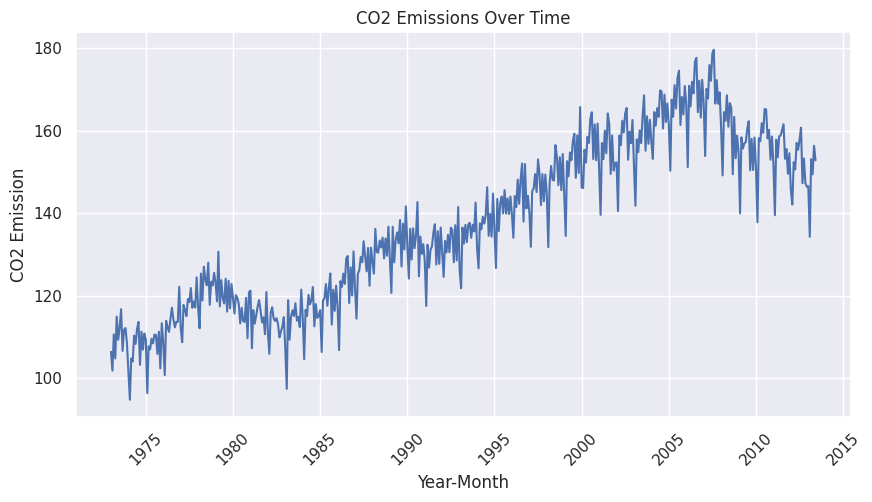

In [40]:
sns.set_theme(style="dark")

# Plot all years' time series in the same graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="Year-Month", y="CO2 Emission", linestyle="-")

# Customize plot
plt.xlabel("Year-Month")
plt.ylabel("CO2 Emission")
plt.title("CO2 Emissions Over Time")
plt.xticks(rotation=45)
plt.grid(True)


In [12]:
df['Month'] = df['Year-Month'].dt.strftime('%B')  # Full month name


### bar plot

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

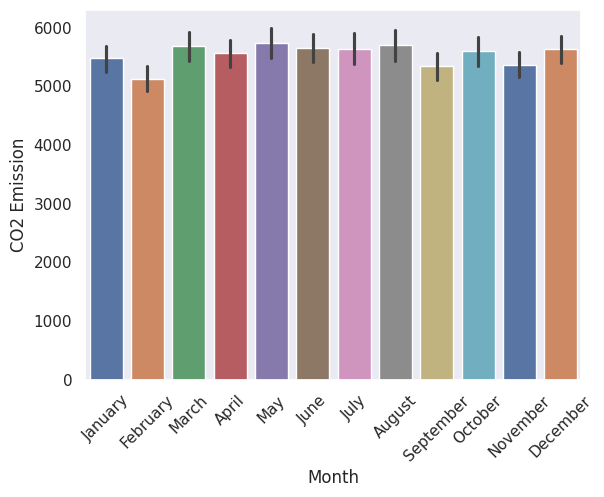

In [13]:
sns.barplot(data=df, x='Month',y='CO2 Emission',estimator=np.sum,hue='Month',palette='deep')

plt.xticks(rotation=45) 

In [14]:
pivot_table = df.pivot_table(values='CO2 Emission', index='Month', aggfunc='sum')

In [15]:
pivot_table

,CO2 Emission
Month,
April,5563.177
August,5706.200
December,5633.687
February,5128.812
January,5480.531
July,5644.630
June,5657.598
March,5693.816
May,5741.150


<Axes: ylabel='CO2 Emission'>

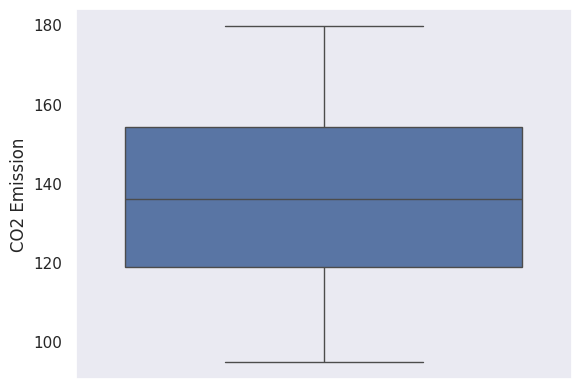

In [16]:
sns.boxplot(data=df,y='CO2 Emission')

from the box plot we can see that there is no outliers and the average of the CO2 Emission is around 135

### histograme

<Axes: xlabel='CO2 Emission', ylabel='Count'>

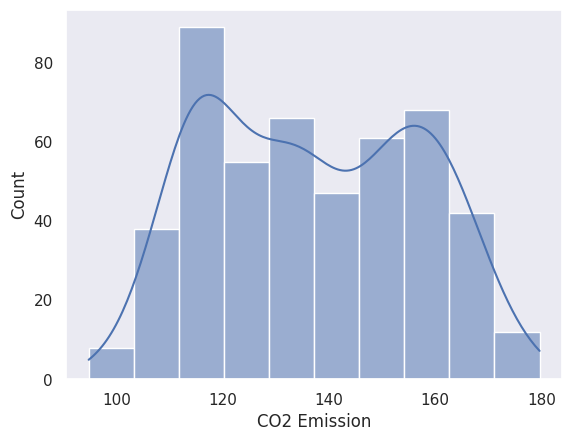

In [17]:
sns.histplot(data=df,x='CO2 Emission',kde=True)

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

## Differencing Series and ADFULLER test for stationarity 

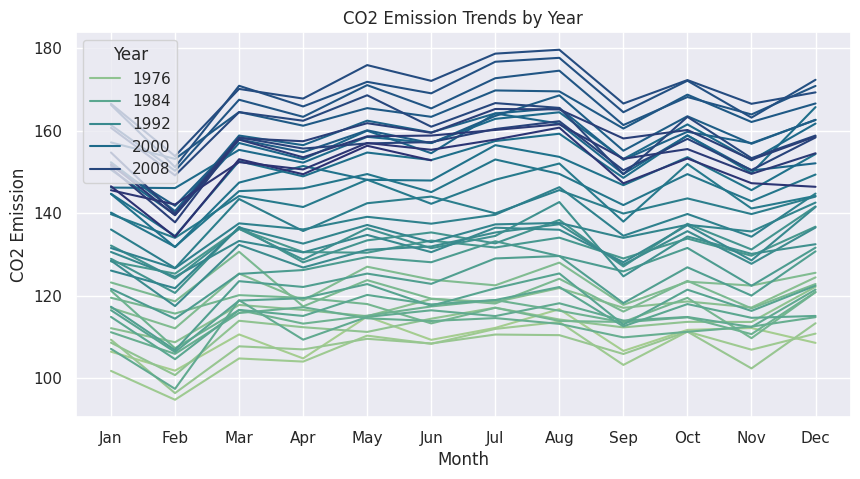

In [11]:

# Sample Data

# Convert "Year-Month" to datetime format
df["Year-Month"] = pd.to_datetime(df["Year-Month"], format="%Y-%b")

# Extract Year and Month
df["Year"] = df["Year-Month"].dt.year
df["Month"] = df["Year-Month"].dt.strftime("%b")  # Short month names

# Set Seaborn theme
sns.set_theme(style="dark")

# Plot all years in the same graph
plt.figure(figsize=(10, 5))

# Plot each year separately but aligned by month
sns.lineplot(data=df, x="Month", y="CO2 Emission", hue="Year", linestyle="-", palette="crest")

# Customize plot
plt.xlabel("Month")
plt.ylabel("CO2 Emission")
plt.title("CO2 Emission Trends by Year")
plt.legend(title="Year")
plt.grid(True)

# Show plot
plt.show()


Index of DataFrame: DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
               '1973-09-01', '1973-10-01',
               ...
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01'],
              dtype='datetime64[ns]', name='Year-Month', length=486, freq=None)

ADF Test Result (Difference Order = 0):
ADF Statistic: -1.7231486969927112
p-value: 0.4192267624634111
Critical Values: {'1%': np.float64(-3.4444002781824477), '5%': np.float64(-2.867735576537528), '10%': np.float64(-2.57007000456571)}
Series is non-stationary. Applying differencing...

ADF Test Result (Difference Order = 1):
ADF Statistic: -3.890772902232354
p-value: 0.002103812687452214
Critical Values: {'1%': np.float64(-3.4444305322234365), '5%': np.float64(-2.8677488864580885), '10%': np.float64(-2.

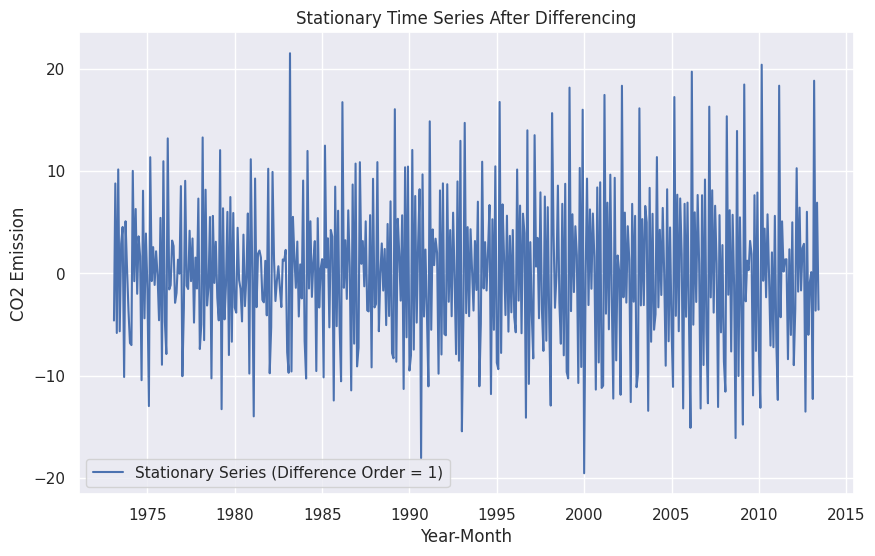

In [12]:
if 'Year-Month' in df.columns:
    df.set_index('Year-Month', inplace=True)
else:
    print("'Year-Month' is already the index.")

# Check the index
print("Index of DataFrame:", df.index)

# Function to perform ADF test and differencing
def make_stationary(series, max_diff=10):
    diff_count = 0
    while diff_count < max_diff:
        # Perform ADF test
        adf_result = adfuller(series.dropna())
        p_value = adf_result[1]
        
        # Print ADF results
        print(f"\nADF Test Result (Difference Order = {diff_count}):")
        print(f"ADF Statistic: {adf_result[0]}")
        print(f"p-value: {p_value}")
        print(f"Critical Values: {adf_result[4]}")
        
        # Check if stationary
        if p_value < 0.05:
            print(f"Series is stationary after {diff_count} differencing step(s).")
            return series, diff_count
        else:
            print("Series is non-stationary. Applying differencing...")
            series = series.diff().dropna()  # Apply first-order differencing
            diff_count += 1
    
    print(f"Series could not be made stationary after {max_diff} differencing steps.")
    return series, diff_count

# Apply the function to make the series stationary
stationary_series, diff_order = make_stationary(df['CO2 Emission'])

# Plot the stationary series
plt.figure(figsize=(10, 6))
plt.plot(stationary_series, label=f'Stationary Series (Difference Order = {diff_order})')
plt.title('Stationary Time Series After Differencing')
plt.xlabel('Year-Month')
plt.ylabel('CO2 Emission')
plt.legend()
plt.grid()
plt.show()

## trend

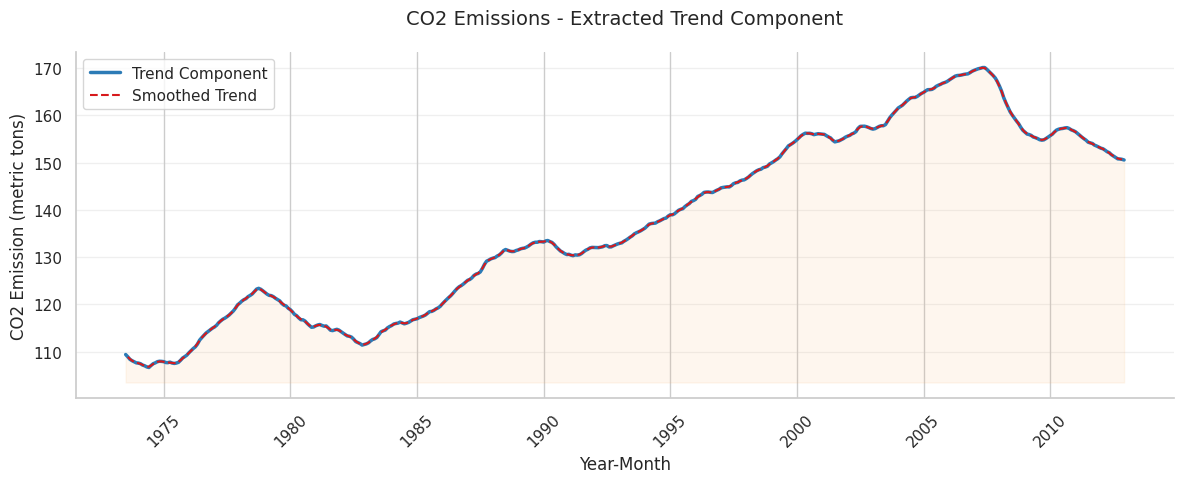

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")

# Perform decomposition
result = seasonal_decompose(df['CO2 Emission'], model='additive', period=12)

# Create figure with just the trend component
plt.figure(figsize=(12, 5))

# Plot trend with enhanced styling
trend_line = result.trend.dropna()  # Remove NaN values from edges
plt.plot(trend_line.index, trend_line.values, 
         color='#2c7bb6', linewidth=2.5, label='Trend Component')

# Add smoothed version (optional)
smooth_trend = trend_line.rolling(window=3, center=True).mean()
plt.plot(smooth_trend.index, smooth_trend.values, 
         '--', color='#d7191c', linewidth=1.5, label='Smoothed Trend')

# Customize plot
plt.title("CO2 Emissions - Extracted Trend Component", fontsize=14, pad=20)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("CO2 Emission (metric tons)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(frameon=True, facecolor='white')

# Add grid and remove spines
sns.despine()
plt.grid(axis='y', alpha=0.3)

# Highlight increasing/decreasing trend direction
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
trend_slope = (trend_line[-1] - trend_line[0])/len(trend_line)
if trend_slope > 0:
    plt.fill_between(trend_line.index, ymin, trend_line.values, 
                    color='#fdae61', alpha=0.1, label='Increasing Trend')
else:
    plt.fill_between(trend_line.index, ymin, trend_line.values, 
                    color='#abd9e9', alpha=0.1, label='Decreasing Trend')

plt.tight_layout()
plt.show()

## Graphical Method for Choosing ARIMA Parameters

- Choose the **p** parameter by looking at the **PACF** plot:  
  Pick the lag where the PACF values drop to zero or fall within the blue confidence area.

- Choose the **q** parameter by looking at the **ACF** plot:  
  Pick the lag where the ACF values drop to zero or fall within the blue confidence area.

> Note: This method is used after the time series is made stationary (if needed).


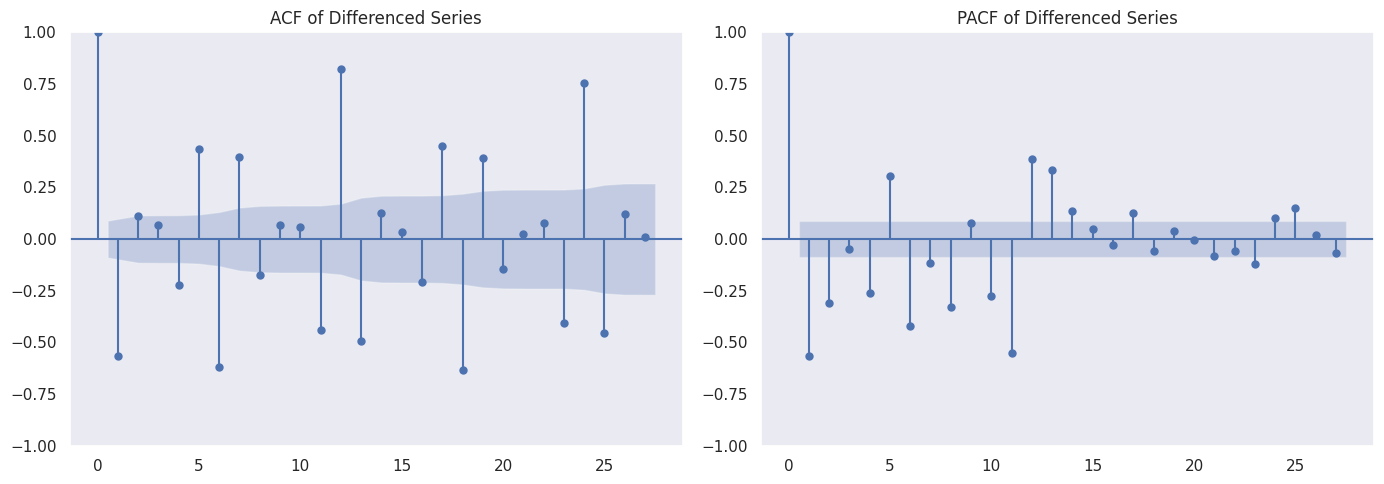

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Differencing the time series (since d=1 in ARIMA(6,1,7))
diff_series = df['CO2 Emission'].diff(1).dropna()

plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plot_acf(diff_series, ax=plt.gca())  
plt.title("ACF of Differenced Series")

plt.subplot(1, 2, 2)
plot_pacf(diff_series, ax=plt.gca())  
plt.title("PACF of Differenced Series")

plt.tight_layout()
plt.show()


## Grid Search

We created a grid search  in the space from 0,5 for `p` and `q` and `d=1`  because we know the series become stationary afteer 1 differencing

In [ ]:
import itertools
import statsmodels.api as sm

# Define search space for p and q
p = q = range(0, 5)  # p and q range from 0 to 5
d = 1  # Fixed differencing order (d = 1)

best_aic = float('inf')
best_order = None

# Try all (p, d=1, q) combinations
for order in itertools.product(p, [d], q):  # Fix d=1 and iterate over p and q
    try:
        model = sm.tsa.ARIMA(df['CO2 Emission'], order=order).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_order = order
    except Exception as e:
        # Optionally log the error or problematic order
        print(f"Failed to fit ARIMA{order}: {e}")
        continue

if best_order is not None:
    print(f"Best ARIMA Order: {best_order} with AIC={best_aic}")
else:
    print("No suitable ARIMA model found.")

Best ARIMA Order: (4, 1, 4) with AIC=2864.951876996419


## rolling Cross validation

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.metrics import mean_absolute_error  # Changed to MAE
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
import plotly.express as px

def hyperparameter_tuning_arima_cv(n_splits: int,
                                  p_values: list[int],
                                  d_values: list[int], 
                                  q_values: list[int],
                                  df: pd.DataFrame) -> pd.DataFrame:
    """Cross-validation hyperparameter tuning for ARIMA parameters"""
    
    tscv = TimeSeriesSplit(n_splits=n_splits)
    error_list = []
    
    # Generate all parameter combinations
    param_grid = itertools.product(p_values, d_values, q_values)
    
    for p, d, q in param_grid:
        try:
            errors = []
            
            for train_index, valid_index in tscv.split(df):
                train, valid = df.iloc[train_index], df.iloc[valid_index]
                
                # Fit ARIMA model with CO2 Emission data
                model = ARIMA(train['CO2 Emission'], order=(p, d, q))  # Changed column
                results = model.fit()
                
                # Forecast
                forecasts = results.forecast(steps=len(valid))
                errors.append(mean_absolute_error(valid['CO2 Emission'], forecasts))  # Changed metric
            
            # Store average error across folds
            avg_error = np.mean(errors)
            error_list.append([p, d, q, avg_error])
            
        except:
            continue
    
    return pd.DataFrame(error_list, columns=['p', 'd', 'q', 'MAE'])  # Changed column name

def plot_arima_error_cv(df: pd.DataFrame,
                       title: str) -> None:
    """Visualization of ARIMA parameter performance"""
    
    # Create label column for visualization
    df['ARIMA Order'] = df[['p', 'd', 'q']].astype(str).agg(','.join, axis=1)
    
    fig = px.bar(df, x='ARIMA Order', y='MAE',  # Changed metric
                 color='MAE', height=500, width=1000)
    fig.update_layout(template="simple_white", 
                     title_text=title,
                     title_x=0.5,
                     xaxis_tickangle=-45)
    fig.show()

# Example usage with your data
# Assuming your dataframe is already loaded as df with datetime index
# df = pd.read_csv('your_data.csv')
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.set_index('Date')

# Define parameter ranges
p_range = range(0, 6)  # 0-5
d_range = range(1, 2)  # 0-1
q_range = range(0, 6)  # 0-5

# Run hyperparameter tuning
error_df = hyperparameter_tuning_arima_cv(
    df=df,  # Your dataframe
    n_splits=4,
    p_values=p_range,
    d_values=d_range,
    q_values=q_range
)

# Sort and display best parameters
best_params = error_df.sort_values('MAE').head(5)  # Changed metric
print("Top 5 Parameter Combinations:")
print(best_params[['p', 'd', 'q', 'MAE']])

# Plot results
plot_arima_error_cv(error_df, 'ARIMA Hyperparameter Tuning Results (MAE)')

## Plot for different values of p and q

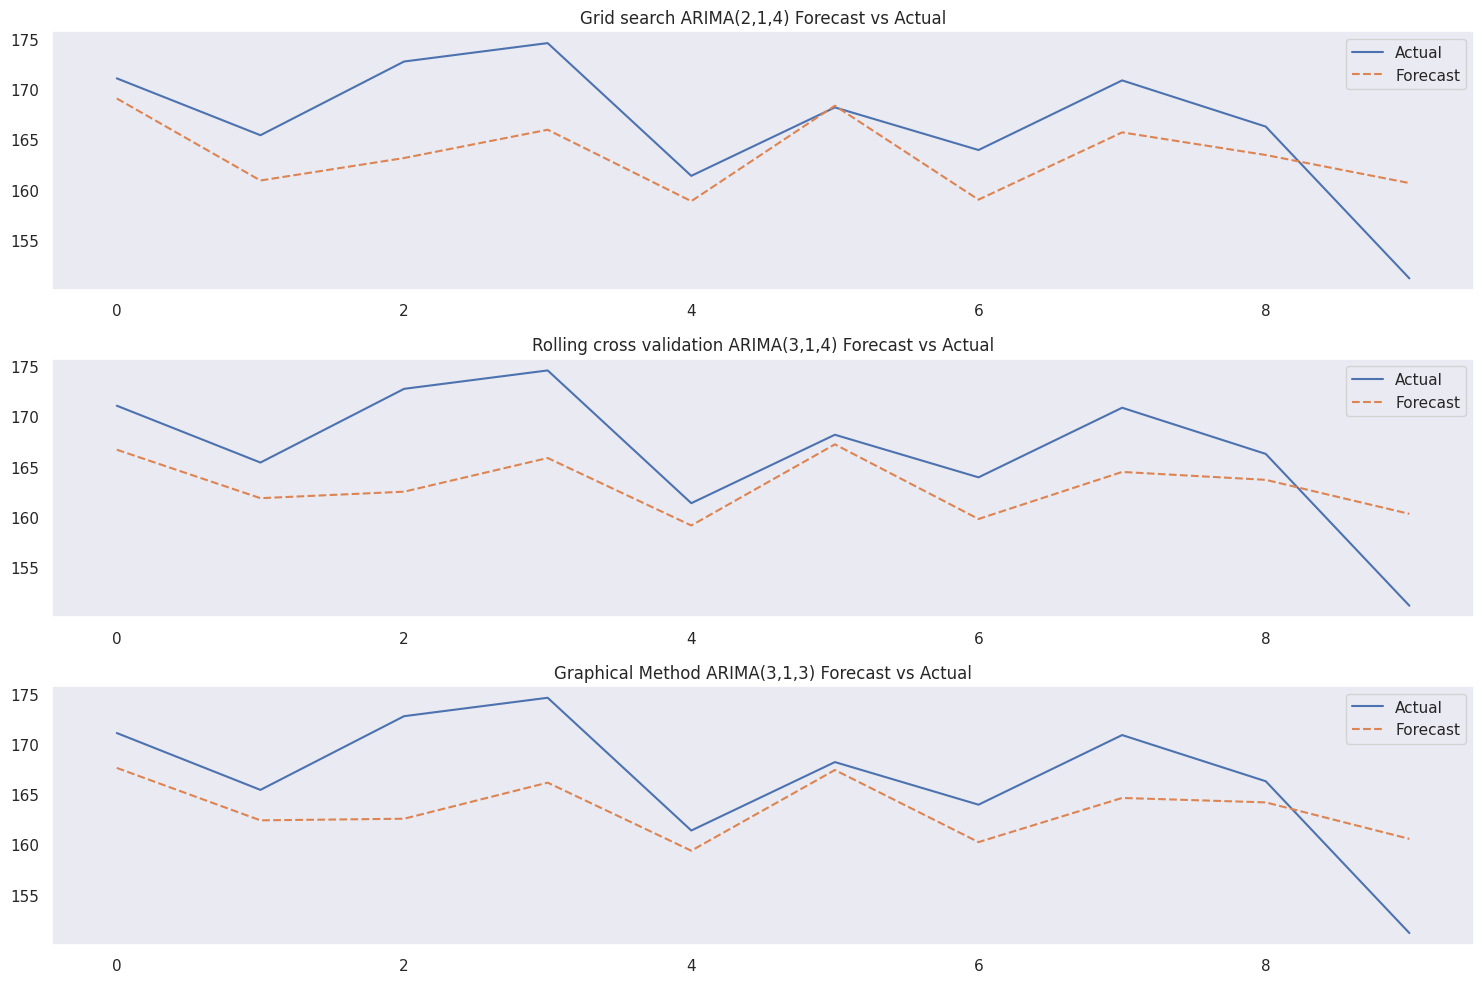

                                   Model        MSE      RMSE       MAE  \
0               Grid search ARIMA(2,1,4)  34.564232  5.879135  4.979335   
1  Rolling cross validation ARIMA(3,1,4)  36.568056  6.047153  5.224534   
2          Graphical Method ARIMA(3,1,3)  34.595957  5.881833  4.935826   

         R²          AIC  
0  0.167965  2253.015649  
1  0.119729  2290.537053  
2  0.167202  2269.781934  


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is your DataFrame with 'CO2 Emission' column
n = len(df)
train_size = int(n * 0.8)
train = df['CO2 Emission'].iloc[:train_size]
test = df['CO2 Emission'].iloc[train_size:]

# Define the models to test
models = {
    'Grid search ARIMA(2,1,4)': (2, 1, 4),
    'Rolling cross validation ARIMA(3,1,4)': (3, 1, 4), 
    'Graphical Method ARIMA(3,1,3)': (3, 1, 3)
}

step = 10
metrics = []

plt.figure(figsize=(15, 10))

for i, (name, order) in enumerate(models.items(), 1):
    try:
        # Fit model on training data
        model = ARIMA(train, order=order)
        result = model.fit()
        
        # Forecast
        fc = result.forecast(step)
        
        # Create subplot
        plt.subplot(3, 1, i)
        plt.plot(test[:step].values, label='Actual')
        plt.plot(fc.values, label='Forecast', linestyle='--')
        plt.title(f'{name} Forecast vs Actual')
        plt.legend()
        
        # Calculate metrics
        mse = mean_squared_error(test[:step], fc)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test[:step], fc)
        r2 = r2_score(test[:step], fc)
        
        metrics.append({
            'Model': name,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2,
            'AIC': result.aic
        })
    except Exception as e:
        print(f"Error with model {name}: {str(e)}")
        continue

plt.tight_layout()
plt.show()

# Display metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

In [29]:

# Create metrics dataframe
metrics_df = pd.DataFrame(metrics)
print("\nModel Performance Comparison:")
display(metrics_df.style.format({
    'MSE': '{:.4f}',
    'RMSE': '{:.4f}', 
    'MAE': '{:.4f}',
    'R²': '{:.4f}'
}).background_gradient(cmap='Blues', subset=['MSE', 'RMSE', 'MAE']) \
  .background_gradient(cmap='Greens', subset=['R²']))


Model Performance Comparison:


,Model,MSE,RMSE,MAE,R²,AIC
0,"Grid search ARIMA(2,1,4)",34.5642,5.8791,4.9793,0.1680,2253.015649
1,"Rolling cross validation ARIMA(3,1,4)",36.5681,6.0472,5.2245,0.1197,2290.537053
2,"Graphical Method ARIMA(3,1,3)",34.5960,5.8818,4.9358,0.1672,2269.781934


## Polting only ARIMA(3,1,3)

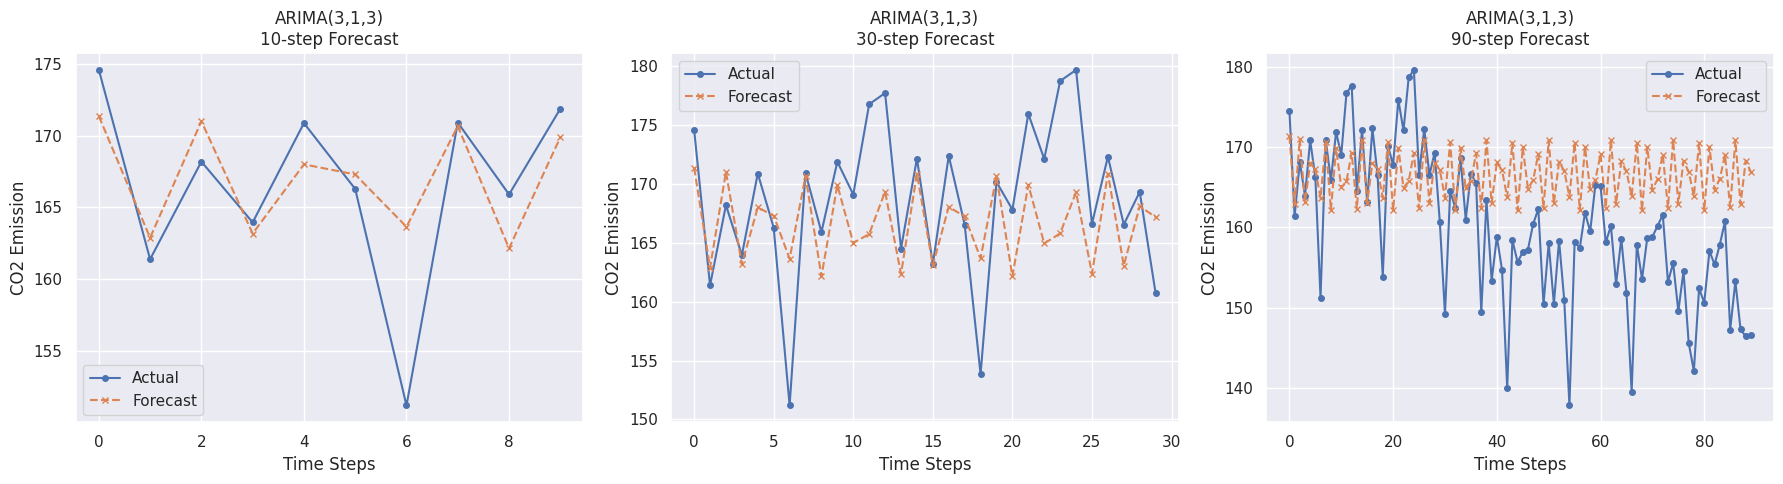

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data preparation
split_idx = int(0.8 * len(df))
train = df['CO2 Emission'].iloc[:split_idx]
test = df['CO2 Emission'].iloc[split_idx:]

# Model configuration
model_name = 'ARIMA(3,1,3)'
model_order = (3, 1, 3)
forecast_steps = [10, 30, 90]

# Create figure and metrics storage
plt.figure(figsize=(18, 5))
metrics_data = []

# Fit model
model = ARIMA(train, order=model_order)
result = model.fit()

for i, steps in enumerate(forecast_steps, 1):
    # Forecast
    fc = result.forecast(steps)
    
    # Create subplot
    plt.subplot(1, 3, i)
    plt.plot(test[:steps].values, label='Actual', marker='o', markersize=4)
    plt.plot(fc.values, label='Forecast', linestyle='--', marker='x', markersize=4)
    plt.title(f'{model_name}\n{steps}-step Forecast')
    plt.xlabel('Time Steps')
    plt.ylabel('CO2 Emission')
    plt.legend()
    plt.grid(True)
    
    # Calculate metrics
    metrics_data.append({
        'Horizon (steps)': steps,
        'MSE': mean_squared_error(test[:steps], fc),
        'RMSE': np.sqrt(mean_squared_error(test[:steps], fc)),
        'MAE': mean_absolute_error(test[:steps], fc),
        'R²': r2_score(test[:steps], fc)
    })

# Create and display metrics DataFrame
metrics_df_arima = pd.DataFrame(metrics_data)
metrics_df_arima.set_index('Horizon (steps)', inplace=True)
metrics_df_arima.style.format({
    'MSE': '{:.4f}',
    'RMSE': '{:.4f}',
    'MAE': '{:.4f}',
    'R²': '{:.4f}'
})


plt.tight_layout()
plt.show()

In [20]:
# Print results
print(f"\nModel: {model_name}")
print(f"AIC: {result.aic:.4f}\n")
print("Forecast Performance Metrics:")
print("\nModel Performance Comparison:")
display(metrics_df_arima.style.format({
    'MSE': '{:.4f}',
    'RMSE': '{:.4f}', 
    'MAE': '{:.4f}',
    'R²': '{:.4f}'
}).background_gradient(cmap='Blues', subset=['MSE', 'RMSE', 'MAE']) \
  .background_gradient(cmap='Greens', subset=['R²']))


Model: ARIMA(3,1,3)
AIC: 2221.5064

Forecast Performance Metrics:

Model Performance Comparison:


,MSE,RMSE,MAE,R²
Horizon (steps),,,,
10,20.3626,4.5125,3.0651,0.4948
30,33.4780,5.7860,4.4007,0.2085
90,116.6336,10.7997,8.8339,-0.3887


As we can see from the Focasting graph that the ARIMA model sturggles with non linear trends which make it unsuitable for our data which have non linear trend  since it's linear model it can't capture complex relation

# SARIMA

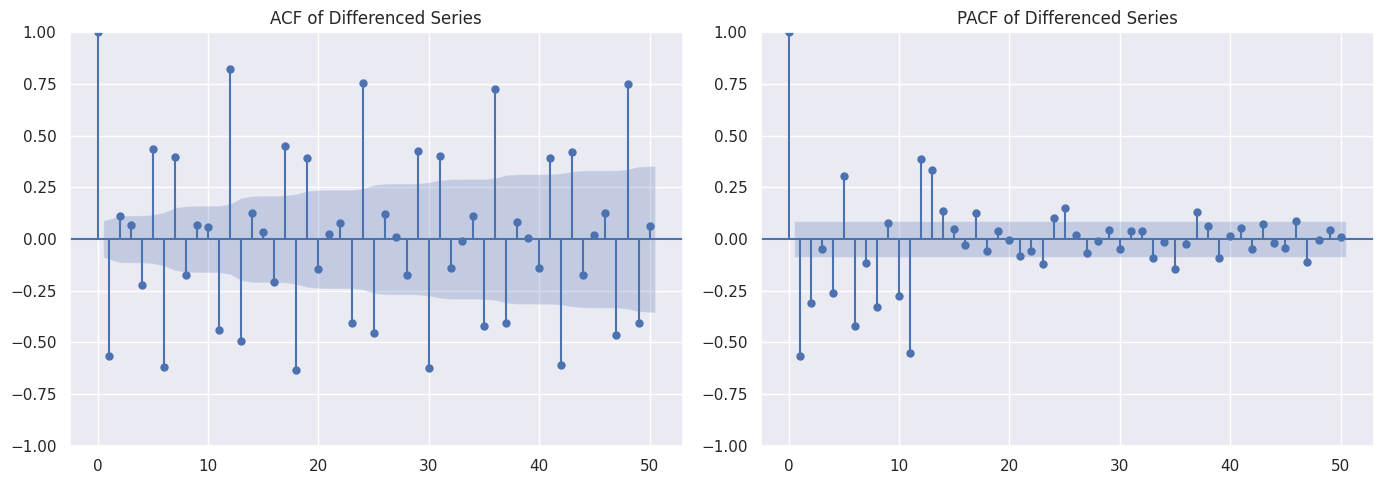

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Differencing the time series (since d=1 in ARIMA(6,1,7))
diff_series = df['CO2 Emission'].diff(1).dropna()

plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plot_acf(diff_series, ax=plt.gca(),lags=50)  
plt.title("ACF of Differenced Series")

plt.subplot(1, 2, 2)
plot_pacf(diff_series, ax=plt.gca(),lags=50)  
plt.title("PACF of Differenced Series")

plt.tight_layout()
plt.show()


<Axes: title={'center': 'After Seasonal Differencing (s=12)'}>

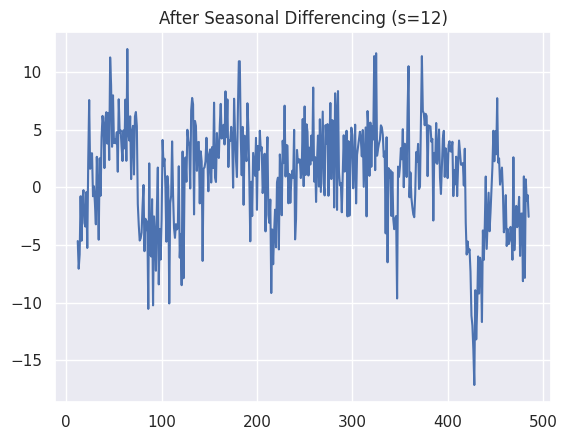

In [8]:
# Apply seasonal differencing (lag-12 for monthly data)
df['CO2_emission_seasonal_diff'] = df['CO2 Emission'].diff(12)

# Drop NaN rows (first 12 values will be NaN)
df = df.dropna()

# Plot the seasonally differenced series
df['CO2_emission_seasonal_diff'].plot(title='After Seasonal Differencing (s=12)')

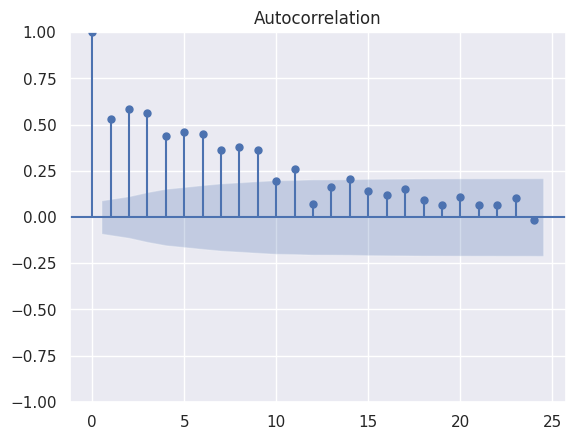

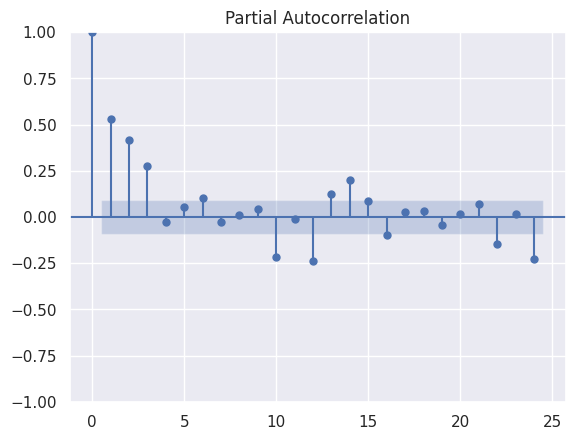

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF/PACF of seasonally differenced series
plot_acf(df['CO2_emission_seasonal_diff'], lags=24)  # Check up to 2 years
plot_pacf(df['CO2_emission_seasonal_diff'], lags=24)
plt.show()

Top 5 Seasonal Parameter Combinations:
   P  D  Q        MAE
3  0  1  1   8.400270
7  1  1  1   8.579236
1  0  0  1   9.669274
0  0  0  0   9.887576
4  1  0  0  10.222432


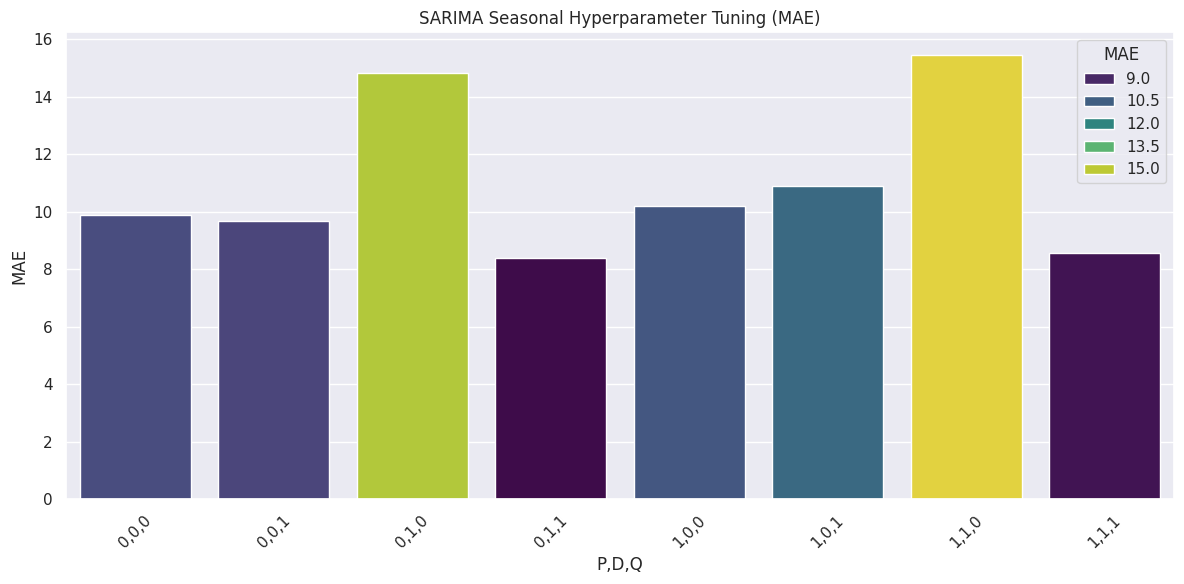

In [10]:
import numpy as np
import pandas as pd
import itertools
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import seaborn as sns

def hyperparameter_tuning_sarima_cv(n_splits: int,
                                   seasonal_p_values: list[int],
                                   seasonal_d_values: list[int],
                                   seasonal_q_values: list[int],
                                   s: int,
                                   df: pd.DataFrame) -> pd.DataFrame:
    """Cross-validation hyperparameter tuning for SARIMA seasonal parameters"""
    
    tscv = TimeSeriesSplit(n_splits=n_splits)
    error_list = []
    
    # Fixed non-seasonal parameters (from your knowledge)
    p, d, q = 3, 1, 3
    
    # Generate all seasonal parameter combinations
    param_grid = itertools.product(seasonal_p_values, seasonal_d_values, seasonal_q_values)
    
    for P, D, Q in param_grid:
        try:
            errors = []
            
            for train_index, valid_index in tscv.split(df):
                train, valid = df.iloc[train_index], df.iloc[valid_index]
                
                # Fit SARIMA model
                model = SARIMAX(train['CO2 Emission'],
                               order=(p, d, q),
                               seasonal_order=(P, D, Q, s))
                results = model.fit(disp=False)
                
                # Forecast
                forecasts = results.get_forecast(steps=len(valid)).predicted_mean
                errors.append(mean_absolute_error(valid['CO2 Emission'], forecasts))
            
            # Store average error across folds
            avg_error = np.mean(errors)
            error_list.append([P, D, Q, avg_error])
            
        except Exception as e:
            print(f"Failed for (P,D,Q)=({P},{D},{Q}): {str(e)}")
            continue
    
    return pd.DataFrame(error_list, columns=['P', 'D', 'Q', 'MAE'])

def plot_sarima_error_cv(df: pd.DataFrame, title: str) -> None:
    """Visualization of SARIMA seasonal parameter performance"""
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='P,D,Q', y='MAE', hue='MAE', palette='viridis', dodge=False)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming your dataframe is loaded as df with datetime index
# df = pd.read_csv('your_data.csv')
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.set_index('Date')

# Define seasonal parameter ranges
P_range = range(0, 2)  # 0-1
D_range = range(0, 2)  # 0-1 (try 1 if seasonality persists)
Q_range = range(0, 2)  # 0-1
seasonal_period = 12   # for monthly data

# Run hyperparameter tuning
error_df = hyperparameter_tuning_sarima_cv(
    df=df,
    n_splits=4,
    seasonal_p_values=P_range,
    seasonal_d_values=D_range,
    seasonal_q_values=Q_range,
    s=seasonal_period
)

# Create label column for visualization
error_df['P,D,Q'] = error_df[['P', 'D', 'Q']].astype(str).agg(','.join, axis=1)

# Sort and display best parameters
best_params = error_df.sort_values('MAE').head(5)
print("Top 5 Seasonal Parameter Combinations:")
print(best_params[['P', 'D', 'Q', 'MAE']])

# Plot results
plot_sarima_error_cv(error_df, 'SARIMA Seasonal Hyperparameter Tuning (MAE)')

/home/oussama/.conda/envs/my_global_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/oussama/.conda/envs/my_global_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/oussama/.conda/envs/my_global_env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/oussama/.conda/envs/my_global_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supp

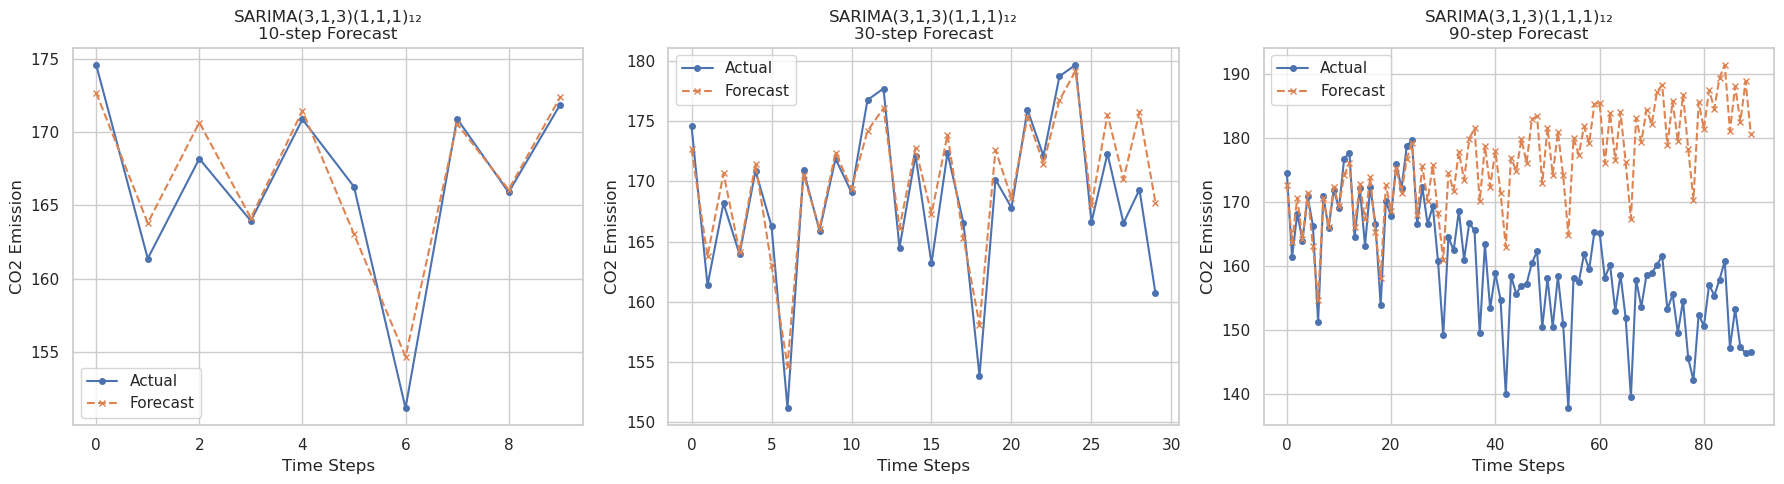

In [28]:

from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMA is the same as SARIMAX you just don't have to add exogenous variables

# Data preparation
split_idx = int(0.8 * len(df))
train = df['CO2 Emission'].iloc[:split_idx]
test = df['CO2 Emission'].iloc[split_idx:]

# Model configuration
model_name = 'SARIMA(3,1,3)(1,1,1)₁₂'
model_order = (3, 1, 3)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s)
forecast_steps = [10, 30, 90]

# Create figure and metrics storage
plt.figure(figsize=(18, 5))
metrics_data = []

# Fit model
model = SARIMAX(train, order=model_order, seasonal_order=seasonal_order)
result = model.fit(disp=False)

for i, steps in enumerate(forecast_steps, 1):
    # Forecast
    fc = result.get_forecast(steps=steps)
    fc_mean = fc.predicted_mean
    
    # Create subplot
    plt.subplot(1, 3, i)
    plt.plot(test[:steps].values, label='Actual', marker='o', markersize=4)
    plt.plot(fc_mean.values, label='Forecast', linestyle='--', marker='x', markersize=4)
    plt.title(f'{model_name}\n{steps}-step Forecast')
    plt.xlabel('Time Steps')
    plt.ylabel('CO2 Emission')
    plt.legend()
    plt.grid(True)
    
    # Calculate metrics
    metrics_data.append({
        'Horizon (steps)': steps,
        'MSE': mean_squared_error(test[:steps], fc_mean),
        'RMSE': np.sqrt(mean_squared_error(test[:steps], fc_mean)),
        'MAE': mean_absolute_error(test[:steps], fc_mean),
        'R²': r2_score(test[:steps], fc_mean)
    })

# Create and display metrics DataFrame
metrics_df_sarima = pd.DataFrame(metrics_data)
metrics_df_sarima.set_index('Horizon (steps)', inplace=True)
metrics_df_sarima.style.format({
    'MSE': '{:.4f}',
    'RMSE': '{:.4f}',
    'MAE': '{:.4f}',
    'R²': '{:.4f}'
})

plt.tight_layout()
plt.show()

In [17]:
# Print results

print("\nModel Performance Comparison:")
display(metrics_df_sarima.style.format({
    'MSE': '{:.4f}',
    'RMSE': '{:.4f}', 
    'MAE': '{:.4f}',
    'R²': '{:.4f}'
}).background_gradient(cmap='Blues', subset=['MSE', 'RMSE', 'MAE']) \
  .background_gradient(cmap='Greens', subset=['R²']))


Model Performance Comparison:


,MSE,RMSE,MAE,R²
Horizon (steps),,,,
10,3.9119,1.9779,1.5342,0.9029
30,7.5280,2.7437,2.0823,0.8220
90,410.8616,20.2697,16.5345,-3.8918


# LSTM

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings

warnings.filterwarnings("ignore")
#seaborn styling
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

sns.set_theme(style="darkgrid")
sns.set_theme()

df=pd.read_csv('Emission.csv')
df.head(1)

,Year-Month,CO2 Emission
0,1973-Jan,106.363


### min max scaler

transfroming the data between 0,1

In [3]:
data=df[['CO2 Emission']]
scaler = MinMaxScaler(feature_range=(-1, 1))
data = scaler.fit_transform(data.values.reshape(-1, 1)).flatten()

### training LSTM

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Decompose to handle trend and seasonality
result = seasonal_decompose(df['CO2 Emission'], model='additive', period=12)

# Create new features from decomposition
df['trend'] = result.trend
df['seasonal'] = result.seasonal
df['residual'] = result.resid

# Fill any NaN values from decomposition
df['trend'].interpolate(inplace=True)
df['residual'].interpolate(inplace=True)

## 2. Feature Engineering ##
# Create lag features for yearly seasonality (assuming monthly data)
for i in range(1, 13):
    df[f'lag_{i}'] = df['CO2 Emission'].shift(i)

# Drop rows with NaN values from lag features
df.dropna(inplace=True)

# Select features - using both decomposed components and lags
features = ['trend', 'seasonal', 'residual'] + [f'lag_{i}' for i in range(1, 13)]
target = 'CO2 Emission'

## 3. Data Scaling ##
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_x.fit_transform(df[features])
y = scaler_y.fit_transform(df[[target]])

## 4. Sequence Creation ##
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X)-seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

# Using 2 years of history (24 months) to capture yearly patterns
SEQ_LENGTH = 24
X_seq, y_seq = create_sequences(X, y, SEQ_LENGTH)

# Train-test split (80-20)
train_size = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

## 5. Enhanced LSTM Model Architecture ##
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(SEQ_LENGTH, X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

## 6. Training with Callbacks ##
callbacks = [
    EarlyStopping(patience=20, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(factor=0.2, patience=10, min_lr=0.00001)
]

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    verbose=1
)



Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - loss: 0.1669 - mae: 0.3191 - val_loss: 0.0492 - val_mae: 0.1987 - learning_rate: 0.0010
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0237 - mae: 0.1190 - val_loss: 0.0117 - val_mae: 0.0844 - learning_rate: 0.0010
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0075 - mae: 0.0681 - val_loss: 0.0174 - val_mae: 0.1072 - learning_rate: 0.0010
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0060 - mae: 0.0615 - val_loss: 0.0127 - val_mae: 0.0872 - learning_rate: 0.0010
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0050 - mae: 0.0551 - val_loss: 0.0165 - val_mae: 0.1037 - learning_rate: 0.0010
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0056 - mae: 0.0577 - val_loss: 0.0144 - val_mae: 0.0944 - learning_rate: 0.0010
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0049 - mae: 0.0551 - val_loss: 0.0102 - val_mae: 0.0756 - learning_rate: 0.0010
Epoch

## plotting LSTM

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Model Performance Comparison:


,Steps,MSE,RMSE,MAE,R²
0,10,11.1427,3.3381,2.9828,0.7548
1,30,15.1865,3.8970,3.3217,0.7287
2,90,13.4803,3.6715,2.8654,0.8475


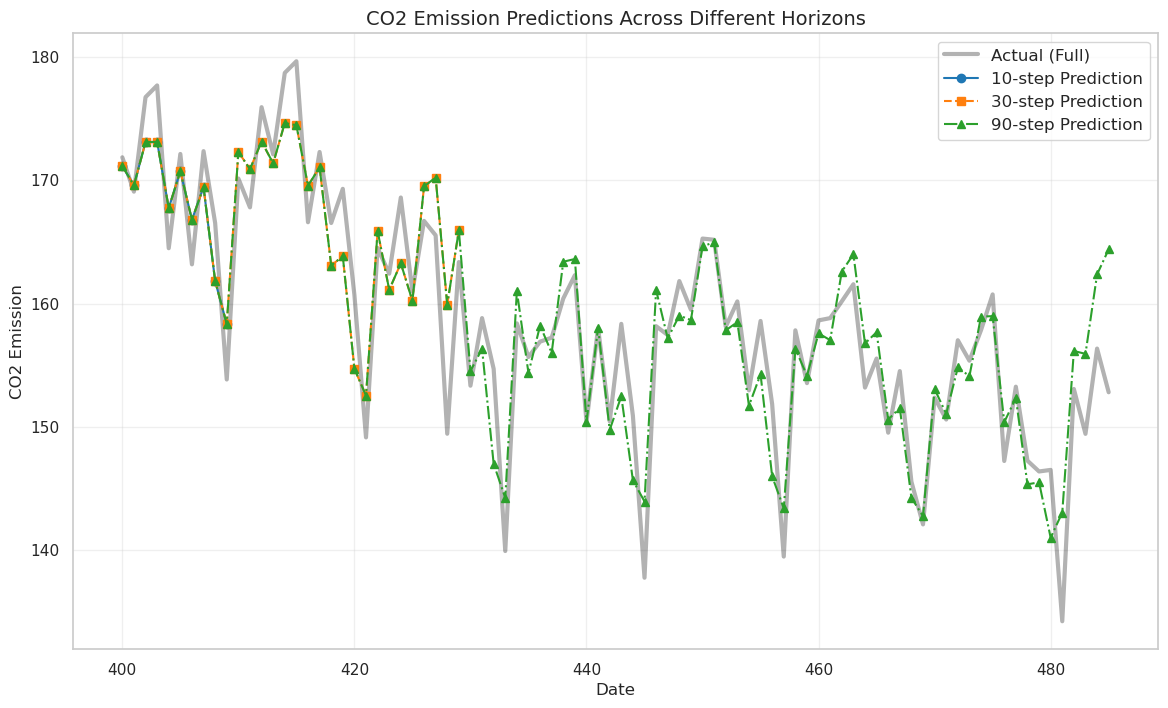

In [37]:
from sklearn.metrics import r2_score
from IPython.display import display

## 7. Evaluation ##
# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse transform predictions
train_pred = scaler_y.inverse_transform(train_pred)
y_train_actual = scaler_y.inverse_transform(y_train)
test_pred = scaler_y.inverse_transform(test_pred)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate metrics for different step lengths
def calculate_metrics(y_true, y_pred, steps):
    return {
        'Steps': steps,
        'MSE': mean_squared_error(y_true[:steps], y_pred[:steps]),
        'RMSE': np.sqrt(mean_squared_error(y_true[:steps], y_pred[:steps])),
        'MAE': mean_absolute_error(y_true[:steps], y_pred[:steps]),
        'R²': r2_score(y_true[:steps], y_pred[:steps])
    }

# Create metrics DataFrame
metrics_data = [
    calculate_metrics(y_test_actual, test_pred, 10),
    calculate_metrics(y_test_actual, test_pred, 30),
    calculate_metrics(y_test_actual, test_pred, 90),
     # All steps
]

metrics_df = pd.DataFrame(metrics_data)

# Create styled metrics table
print("\nModel Performance Comparison:")
display(metrics_df.style.format({
    'MSE': '{:.4f}',
    'RMSE': '{:.4f}', 
    'MAE': '{:.4f}',
    'R²': '{:.4f}'
}).background_gradient(cmap='Blues', subset=['MSE', 'RMSE', 'MAE']) \
      .background_gradient(cmap='Greens', subset=['R²']))

## 8. Visualization ##
# Prepare index for plotting
plot_train = range(SEQ_LENGTH, SEQ_LENGTH+len(train_pred))
plot_test = range(SEQ_LENGTH+len(train_pred), SEQ_LENGTH+len(train_pred)+len(test_pred))

# Combined step-wise plot
plt.figure(figsize=(14, 8))

# Plot actual values
plt.plot(df.index[plot_test], y_test_actual, label='Actual (Full)', color='black', alpha=0.3, linewidth=3)

# Plot predictions for different horizons
plt.plot(df.index[plot_test][:10], test_pred[:10], label='10-step Prediction', marker='o', linestyle='-', color='#1f77b4')
plt.plot(df.index[plot_test][:30], test_pred[:30], label='30-step Prediction', marker='s', linestyle='--', color='#ff7f0e')
plt.plot(df.index[plot_test][:90], test_pred[:90], label='90-step Prediction', marker='^', linestyle='-.', color='#2ca02c')

plt.title('CO2 Emission Predictions Across Different Horizons', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CO2 Emission', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()



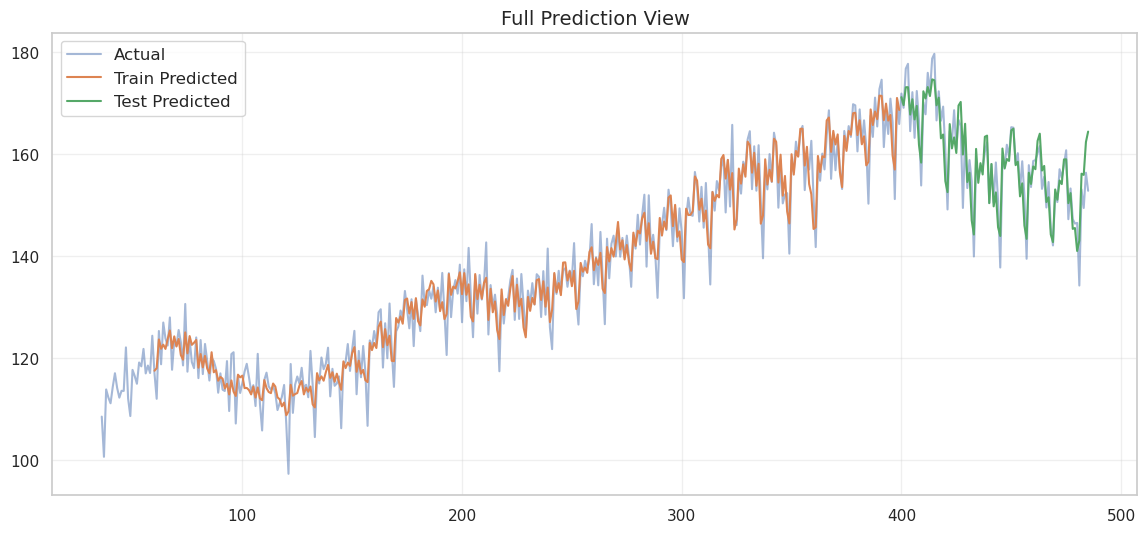

In [38]:
# Full prediction view
plt.figure(figsize=(14,6))
plt.plot(df.index, df['CO2 Emission'], label='Actual', alpha=0.5)
plt.plot(df.index[plot_train], train_pred, label='Train Predicted')
plt.plot(df.index[plot_test], test_pred, label='Test Predicted')
plt.title('Full Prediction View', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Transformer

In [1]:
import pandas as pd 
import numpy as np


In [2]:
df=pd.read_csv('Emission.csv')

## split the data 

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf  # Added this import
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load data
df = pd.read_csv('Emission.csv')

# 1. Prepare data
train_size = int(len(df) * 0.8)
train = df[['CO2 Emission']].iloc[:train_size]
test = df[['CO2 Emission']].iloc[train_size:]


## Scaling the data 

In [15]:

# 2. Scale data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)  # Fixed typo in variable name
test_scaled = scaler.transform(test)

# 3. Create sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps, 0])  # Take first (and only) feature
    return np.array(X), np.array(y)

n_steps = 24
X_train, y_train = create_sequences(train_scaled, n_steps)
X_test, y_test = create_sequences(test_scaled, n_steps)

# Verify shapes
print(f"X_train shape: {X_train.shape}")  # Should be (samples, timesteps, features)
print(f"y_train shape: {y_train.shape}")


X_train shape: (364, 24, 1)
y_train shape: (364,)


## Build Model

In [ ]:

# 4. Improved Transformer model
def build_transformer_model(input_shape):
    inputs = keras.Input(shape=input_shape)
    
    # Positional encoding using TensorFlow operations
    positions = tf.range(input_shape[0], dtype=tf.float32)
    positions = tf.expand_dims(positions, 1)  # (seq_len, 1)
    angle_rates = 1 / np.power(10000, (2 * (np.arange(input_shape[1])//2)) / np.float32(input_shape[1]))
    angle_rads = positions * angle_rates  # (seq_len, d_model)
    
    # Apply sin to even indices and cos to odd indices
    sines = tf.math.sin(angle_rads[:, 0::2])
    cosines = tf.math.cos(angle_rads[:, 1::2])
    pos_encoding = tf.concat([sines, cosines], axis=-1)
    pos_encoding = tf.expand_dims(pos_encoding, 0)  # (1, seq_len, d_model)
    
    # Combine input with positional encoding
    x = layers.Dense(64)(inputs)  # Project to higher dimension
    x = x + pos_encoding
    
    # Transformer block
    x = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = layers.Dropout(0.1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    
    # Feed forward
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(input_shape[1])(x)
    
    # Global average and output
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(1)(x)
    
    return keras.Model(inputs=inputs, outputs=outputs)

# Build model
model = build_transformer_model((n_steps, 1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss='mse',
              metrics=['mae'])

# Add callbacks
callbacks = [
    keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
]


## Train the model

In [ ]:

# 5. Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)


## Metrics

In [ ]:

# 6. Evaluate and predict
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.4f}")

test_predictions = model.predict(X_test).flatten()
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

X_train shape: (364, 24, 1)
y_train shape: (364,)
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.6304 - mae: 0.6485 - val_loss: 1.1843 - val_mae: 1.0172 - learning_rate: 1.0000e-04
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.1545 - mae: 0.3173 - val_loss: 0.6987 - val_mae: 0.7602 - learning_rate: 1.0000e-04
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1303 - mae: 0.2833 - val_loss: 0.5814 - val_mae: 0.6841 - learning_rate: 1.0000e-04
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1160 - mae: 0.2685 - val_loss: 0.5526 - val_mae: 0.6662 - learning_rate: 1.0000e-04
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1226 - mae: 0.2735 - val_loss: 0.4925 - val_mae: 0.6240 - learning_rate: 1.0000e-04
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0982 - mae: 0.2436 - val_loss: 0.4956 - val_mae: 0.6266 - learning_rate: 1.0000e-04
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0985 - mae:

## Ploting

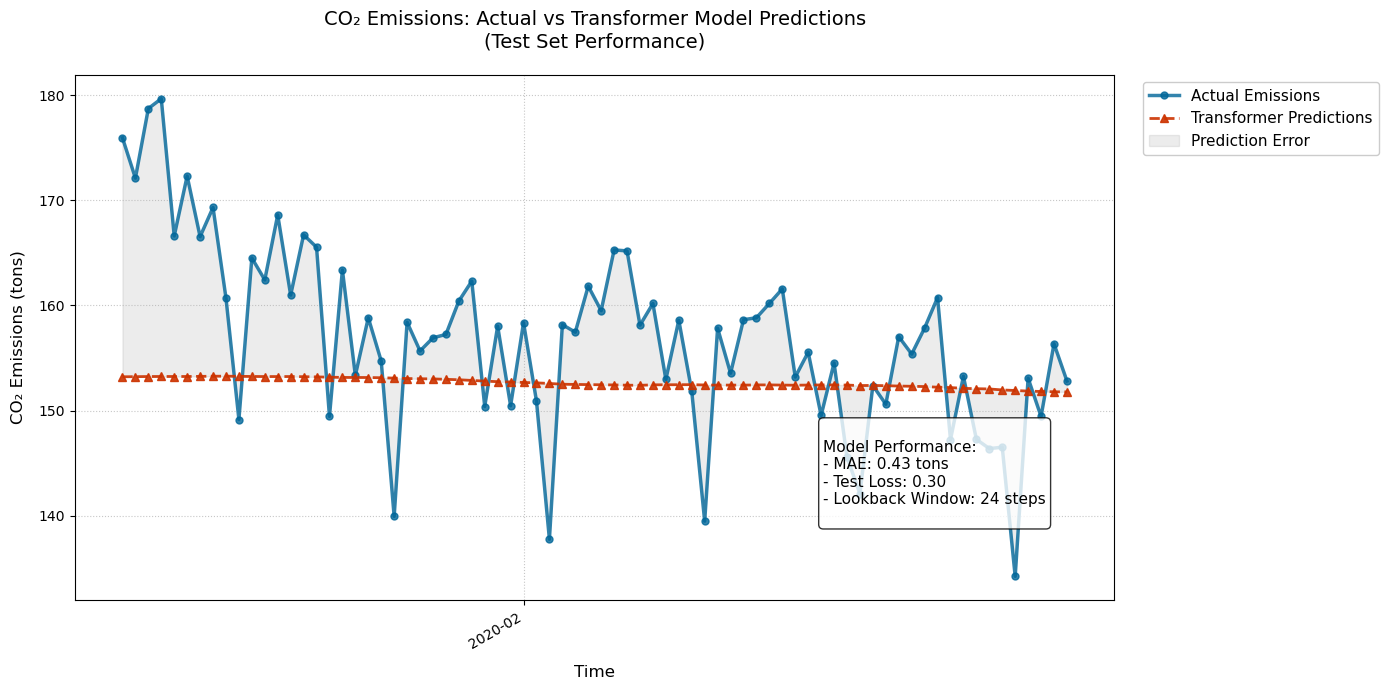

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Create time index (assuming you might have dates, or create sequential index)
# Option 1: If you have datetime index in your original dataframe
# dates = df.index[train_size+n_steps:]  # Skip first n_steps points

# Option 2: Create sequential index (if no dates available)
dates = [datetime(2020,1,1) + timedelta(days=i) for i in range(len(y_test_actual))]

plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(dates, y_test_actual, 
         label='Actual Emissions', 
         color='#006699',
         linewidth=2.5,
         marker='o', 
         markersize=5,
         alpha=0.8)

# Plot predicted values
plt.plot(dates, test_predictions, 
         label='Transformer Predictions', 
         color='#cc3300',
         linewidth=2,
         linestyle='--',
         marker='^', 
         markersize=6,
         alpha=0.9)

# Add error shading
plt.fill_between(dates, 
                 y_test_actual.flatten(), 
                 test_predictions.flatten(),
                 color='gray', 
                 alpha=0.15,
                 label='Prediction Error')

# Customize plot appearance
plt.title('CO₂ Emissions: Actual vs Transformer Model Predictions\n(Test Set Performance)', 
          fontsize=14, pad=20)
plt.xlabel('Time', fontsize=12, labelpad=10)
plt.ylabel('CO₂ Emissions (tons)', fontsize=12, labelpad=10)
plt.grid(True, linestyle=':', alpha=0.7)

# Format x-axis if using dates
if isinstance(dates[0], datetime):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gcf().autofmt_xdate()

# Add statistics box
stats_text = f"""
Model Performance:
- MAE: {test_mae:.2f} tons
- Test Loss: {test_loss:.2f}
- Lookback Window: {n_steps} steps
"""
plt.annotate(stats_text, 
             xy=(0.72, 0.15), 
             xycoords='axes fraction',
             fontsize=11,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add legend outside plot
plt.legend(fontsize=11, framealpha=1, bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()